In [1]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
import random

import vrpSolver
# %matplotlib notebook

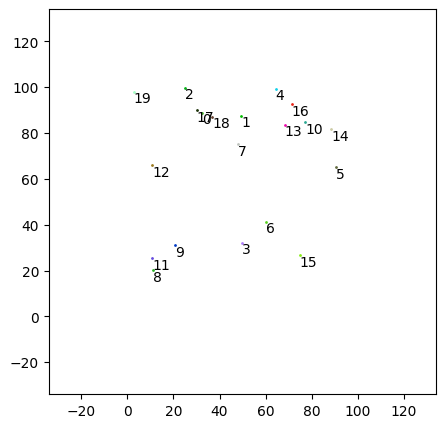

In [2]:
# Generate and plot instance
nodes = vrpSolver.rndNodes(
    N = 20,
    distr = 'UniformSquareXY',
    xRange = (0, 100),
    yRange = (0, 100)
)
fig, ax = vrpSolver.plotNodes(
    nodes = nodes, 
    boundingBox = (-20, 120, -20, 120)
)

In [3]:
for n in nodes:
    nodes[n]['price'] = 100 * random.random()

In [4]:
# DFJ with lazy cut
DFJ_Lazy = vrpSolver.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'IP',
    fml = 'DFJ_Lazy',
    solver = 'Gurobi',
    detailsFlag = False,
    outputFlag = False)

In [5]:
DFJ_Lazy

{'ofv': 343.58424302639094,
 'seq': [0,
  17,
  2,
  19,
  12,
  11,
  8,
  9,
  3,
  6,
  15,
  5,
  14,
  10,
  13,
  16,
  4,
  1,
  7,
  18,
  0],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 343.58424302639094,
 'upperBound': 343.58424302639094,
 'runtime': 0.0064029693603515625}

In [6]:
tau, _ = vrpSolver.matrixDist(
    nodes = nodes,
    edges = 'Euclidean')

In [7]:
tau[4, 2]

39.229647463026524

In [8]:
OP = vrpSolver.solveOP(
    nodes = nodes,
    startID = 4,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'MTZ'
)

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 460 rows, 400 columns and 2643 nonzeros
Model fingerprint: 0xf4eeb002
Variable types: 20 continuous, 380 integer (380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Found heuristic solution: objective 59.2594475
Presolve removed 40 rows and 0 columns
Presolve time: 0.01s
Presolved: 420 rows, 400 columns, 2588 nonzeros
Variable types: 20 continuous, 380 integer (380 binary)

Root relaxation: objective 9.095648e+02, 154 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  909.56482    0   33   59.25945  909.56482  1435%     -    0s
H    0     0                    

In [9]:
OP

{'ofv': 673.886357242218,
 'dist': 198.0941835993842,
 'seq': [4, 16, 13, 10, 14, 5, 15, 6, 7, 1, 18, 0, 17, 2],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 673.886357242218,
 'upperBound': 673.886357242218,
 'runtime': 1.1573257446289062}

In [10]:
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeSeq = OP['seq'])

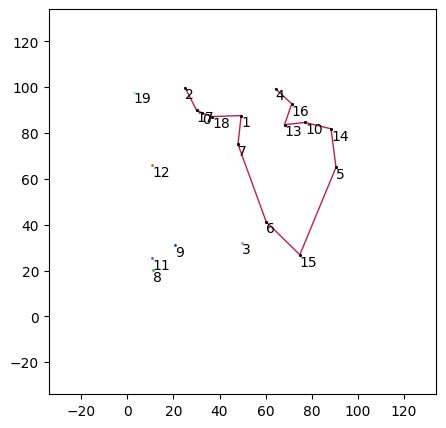

In [11]:
fig

In [12]:
OP = vrpSolver.solveOP(
    nodes = nodes,
    startID = 4,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'DFJ_Lazy'
)

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 40 rows, 380 columns and 1463 nonzeros
Model fingerprint: 0x89a3c2b3
Variable types: 0 continuous, 380 integer (380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Found heuristic solution: objective 100.7362387
Presolve time: 0.00s
Presolved: 40 rows, 380 columns, 1448 nonzeros
Variable types: 0 continuous, 380 integer (380 binary)

Root relaxation: objective 9.063896e+02, 75 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  906.38958    0    6  100.73624  906.38958   800%     -    0s
H    0     0                     3

In [13]:
OP

{'ofv': 674.7058303685313,
 'dist': 197.382729052369,
 'seq': [4, 16, 14, 10, 13, 7, 12, 2, 17, 0, 18, 1, 4],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 674.7058303685313,
 'upperBound': 674.7058303685313,
 'runtime': 0.5614700317382812}

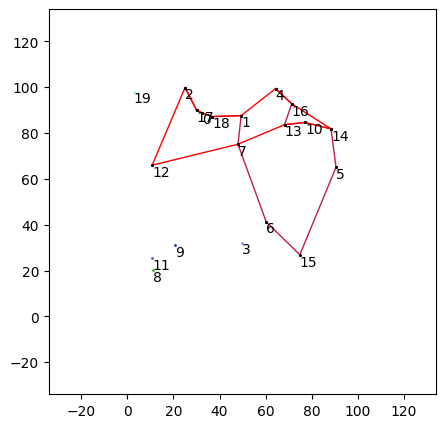

In [14]:
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeSeq = OP['seq'],
    lineColor = 'red')
fig

In [ ]:
for i in range(100):
    nodes = vrpSolver.rndNodes(
        N = 20,
        distr = 'UniformSquareXY',
        xRange = (0, 100),
        yRange = (0, 100)
    )
    for n in nodes:
        nodes[n]['price'] = 100 * random.random()
        
    vrpSolver.saveDictionary(nodes, "OP_20_ID_%s" % i)
        
    OPMTZ = vrpSolver.solveOP(
        nodes = nodes,
        startID = 1,
        endID = 2,
        maxBudget = 200,
        algo = "IP",
        solver = "Gurobi",
        fml = 'MTZ'
    )
    OPDFJ = vrpSolver.solveOP(
        nodes = nodes,
        startID = 1,
        endID = 2,
        maxBudget = 200,
        algo = "IP",
        solver = "Gurobi",
        fml = 'DFJ_Lazy'
    )
    
    print(vrpSolver.hyphenStr("ID: " + str(i)))
    print("ofv", OPMTZ['ofv'], "dist: ", OPMTZ['dist'])
    print(OPMTZ['seq'])
    print("runtime: ", OPMTZ['runtime'])
    
    print("ofv", OPDFJ['ofv'], "dist: ", OPDFJ['dist'])
    print(OPDFJ['seq'])
    print("runtime: ", OPDFJ['runtime'])
    print("\n")

---------------------------------- ID: 0 ----------------------------------
ofv 398.4750158203001 dist:  187.27808801909802
[1, 5, 17, 11, 10, 6, 19, 4, 2]
runtime:  3.5383167266845703
ofv 398.4750158203001 dist:  196.254596395985
[1, 11, 17, 5, 10, 4, 19, 6, 2]
runtime:  1.4577808380126953


---------------------------------- ID: 1 ----------------------------------
ofv 737.9112667504037 dist:  197.57315607541932
[1, 19, 3, 0, 16, 9, 5, 13, 8, 4, 18, 14, 15, 2]
runtime:  0.2806739807128906
ofv 737.9112667504037 dist:  198.3458068123025
[1, 19, 3, 0, 16, 9, 5, 13, 8, 4, 18, 15, 14, 2]
runtime:  0.20920944213867188


---------------------------------- ID: 2 ----------------------------------
ofv 716.4748556842195 dist:  196.04948464710074
[1, 15, 10, 6, 3, 9, 0, 16, 8, 4, 19, 12, 17, 2]
runtime:  6.994533538818359
ofv 716.4748556842195 dist:  199.66018838955438
[1, 15, 10, 6, 3, 9, 0, 16, 8, 4, 12, 19, 17, 2]
runtime:  3.267946243286133


---------------------------------- ID: 3 -------

In [3]:
nodes = vrpSolver.loadDictionary("OP_20_ID_4")

In [3]:
OPMTZ = vrpSolver.solveOP(
    nodes = nodes,
    startID = 1,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'MTZ'
)

In [4]:
OPDFJ = vrpSolver.solveOP(
    nodes = nodes,
    startID = 1,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'DFJ_Lazy'
)

In [5]:
OPDFJ

{'ofv': 591.6382223328002,
 'dist': 199.21537058856288,
 'seq': [1, 18, 6, 17, 16, 3, 14, 9, 2],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 591.6382223328002,
 'upperBound': 591.6382223328002,
 'runtime': 0.9023914337158203}

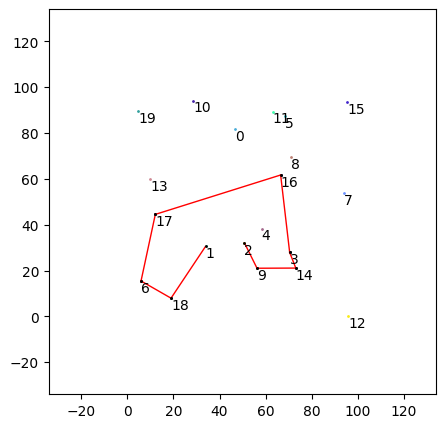

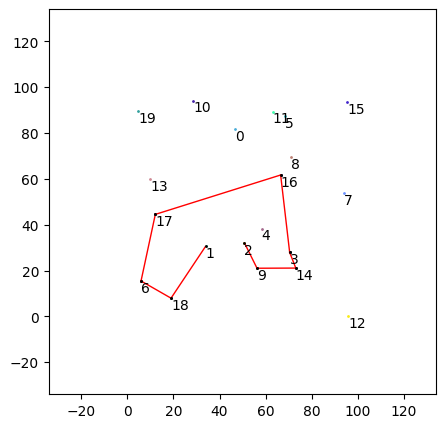

In [6]:
fig, ax = vrpSolver.plotNodes(
    nodes = nodes, 
    boundingBox = (-20, 120, -20, 120)
)
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeSeq = OPDFJ['seq'],
    lineColor = 'red')
fig